# Identifying Support and Resistance Levels in Stock Prices using Fractal Analysis

Notebook created on 2nd May 2023

***

#### Abstract 

This project utilises stock market prices to identify potential support and resistance levels using two methods: fractal candlestick pattern and window shifting. The resulting plot shows the identified levels overlaid on the original stock price data, giving insights into potential buying and selling opportunities for traders and investors.

***

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

#### Import Symbol 

In [2]:
def get_stock_price(symbol):
  df = yf.download(symbol, start='2022-11-01', threads= False)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df

symbol = '^NSEBANK'
df = get_stock_price(symbol)

[*********************100%***********************]  1 of 1 completed


In [3]:
#method 1: fractal candlestick pattern
# determine bullish fractal 

def is_support(df,i):  
  cond1 = df['Low'][i] < df['Low'][i-1]   
  cond2 = df['Low'][i] < df['Low'][i+1]   
  cond3 = df['Low'][i+1] < df['Low'][i+2]   
  cond4 = df['Low'][i-1] < df['Low'][i-2]  
  return (cond1 and cond2 and cond3 and cond4) 

# determine bearish fractal

def is_resistance(df,i):  
  cond1 = df['High'][i] > df['High'][i-1]   
  cond2 = df['High'][i] > df['High'][i+1]   
  cond3 = df['High'][i+1] > df['High'][i+2]   
  cond4 = df['High'][i-1] > df['High'][i-2]  
  return (cond1 and cond2 and cond3 and cond4)

# to make sure the new level area does not exist already

def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['High'] - df['Low'])    
  return np.sum([abs(value-level)<ave for _,level in levels])==0

# a list to store resistance and support levels

levels = []
for i in range(2, df.shape[0] - 2):  
  if is_support(df, i):    
    low = df['Low'][i]    
    if is_far_from_level(low, levels, df):      
      levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['High'][i]    
    if is_far_from_level(high, levels, df):      
      levels.append((i, high))

The is_support and is_resistance functions are used to identify bullish and bearish fractals respectively, based on the four conditions specified in each function. The is_far_from_level function is used to check if the new support or resistance level is not too close to an existing one, using the average distance between the high and low prices as a threshold.

Finally, a list levels is created to store the identified support and resistance levels, using the is_support and is_resistance functions and the is_far_from_level function to filter out duplicate levels.

In [4]:
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='green', 
    colordown='red', alpha=0.8)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

The function plot_all takes two arguments: levels, a list of tuples representing the support and resistance levels identified by the previous code block, and df, a pandas DataFrame containing the financial time series data.

It then plots the candlestick chart using candlestick_ohlc from the mpl_finance module, with the price data from df, and the colors green and red to indicate up and down periods respectively.

Next, the function sets the date format for the x-axis tick labels using ax.xaxis.set_major_formatter. 

Finally, the function plots each of the support and resistance levels as horizontal lines using plt.hlines, with the level value taken from the tuple, and the minimum x-coordinate and maximum x-coordinate obtained from the Date column of df and the max function respectively.

[*********************100%***********************]  1 of 1 completed


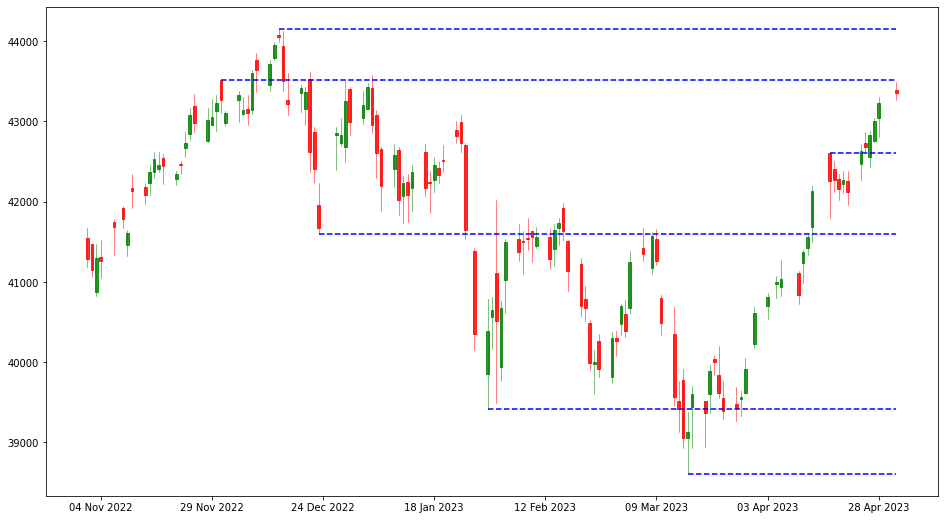

In [5]:
#method 2: window shifting method
#using the same symbol as the first example above

df = get_stock_price(symbol)
pivots = []

max_list = []
min_list = []

for i in range(5, len(df)-5):
# taking a window of 9 candles
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  
# if we find a new maximum value, empty the max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  
# if the maximum value remains the same after shifting 5 times
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
    
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))

plot_all(pivots, df)

Finally, the code calls the plot_all function (defined in the first code block) to plot the financial time series data and the identified support and resistance levels on the same chart.

Overall, this code block is using a window shifting method to identify potential support and resistance levels in a financial time series dataset, where a level is identified if the maximum or minimum value within a window of 9 candles remains the same for 5 consecutive periods and is far from any previously identified levels.

***

# Disclaimer 

It is important to note that this code only provides a simple implementation of identifying support and resistance levels, and should be used with caution. Other factors such as market conditions, volume, and news events should also be considered when making trading decisions. Additionally, this code does not take into account potential false positives or false negatives, which can occur when using technical analysis methods.

Thanks for reading!

Best,
Chirsler.